## Study and preparation of the  Mental health (train)


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Mental_Health = pd.read_csv('Datasheet/Mental_Health_train.csv')

In [3]:
Mental_Health.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [4]:
def horas_cat(value):
    if value in ["Less than 5 hours", "3-4 hours", "1-2 hours", "2-3 hours","4-5 hours"]:
        return 4.5
    elif value in ["5-6 hours"]:
        return 5.5
    elif value in ["6-7 hours", "6-8 hours"]:
        return 6.5
    elif value in ["7-8 hours"]:
        return 7.5
    elif value in [ "More than 8 hours"]:
        return 8.5
    elif value in [ "8-9 hours", "9-10 hours", "9-11 hours", "10-11 hours"]:
        return 10
    elif value in [ "50-75 hours", "55-66 hours", "60-65 hours", "20-21 hours", "35-36 hours","40-45 hours",
                   "45-48 hours"]:
        return 12 
    else:
        return np.nan

In [5]:
Mental_Health['Sleep Duration'] = Mental_Health['Sleep Duration'].apply(horas_cat)

In [6]:
Mental_Health['Sleep Duration']=Mental_Health['Sleep Duration'].fillna(6.5)

In [7]:
Mental_Health['Sleep Duration'].value_counts()

Sleep Duration
4.5     38809
7.5     36969
8.5     32726
5.5     32142
6.5        44
10.0        6
12.0        4
Name: count, dtype: int64

In [8]:
    def Comida(value):
        if value in ['Healthy', "More Healthy"]:
            return 2
        elif value in ['Unhealthy']:
            return 0
        elif value in ['Moderate']:
            return 1
        else:
            return np.nan# Modules

In [9]:
Mental_Health['Dietary Habits'] = Mental_Health['Dietary Habits'].apply(Comida)

In [10]:
Mental_Health['Dietary Habits']=Mental_Health['Dietary Habits'].fillna(0)

In [11]:
Mental_Health['Dietary Habits'].value_counts()

Dietary Habits
1.0    49705
0.0    46252
2.0    44743
Name: count, dtype: int64

In [12]:
Mental_Health = Mental_Health.drop(columns = ['Name', 'Profession', 'CGPA', 'Degree'])

In [13]:
Mental_Health.head(3)

,id,Gender,Age,City,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49.0,Ludhiana,Working Professional,NaN,5.0,NaN,2.0,8.5,2.0,No,1.0,2.0,No,0
1,1,Male,26.0,Varanasi,Working Professional,NaN,4.0,NaN,3.0,4.5,0.0,Yes,7.0,3.0,No,1
2,2,Male,33.0,Visakhapatnam,Student,5.0,NaN,2.0,NaN,5.5,2.0,Yes,3.0,1.0,No,1


In [14]:
Mental_Health['Work'] = Mental_Health['Working Professional or Student'] #change the name of the column
Mental_Health.drop(columns='Working Professional or Student',axis=1, inplace=True) 
Mental_Health.head(3)

,id,Gender,Age,City,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work
0,0,Female,49.0,Ludhiana,NaN,5.0,NaN,2.0,8.5,2.0,No,1.0,2.0,No,0,Working Professional
1,1,Male,26.0,Varanasi,NaN,4.0,NaN,3.0,4.5,0.0,Yes,7.0,3.0,No,1,Working Professional
2,2,Male,33.0,Visakhapatnam,5.0,NaN,2.0,NaN,5.5,2.0,Yes,3.0,1.0,No,1,Student


In [15]:
#drop 'Nan' to make the new columns
Mental_Health['Academic Pressure'] = Mental_Health['Academic Pressure'].replace(to_replace=np.nan, value=0)
Mental_Health['Work Pressure'] = Mental_Health['Work Pressure'].replace(to_replace=np.nan, value=0)
Mental_Health['Study Satisfaction'] = Mental_Health['Study Satisfaction'].replace(to_replace=np.nan, value=0)
Mental_Health['Job Satisfaction'] = Mental_Health['Job Satisfaction'].replace(to_replace=np.nan, value=0)
# Female = 1, Male = 0 
Mental_Health['Gender'] = Mental_Health['Gender'].replace(to_replace={'Female': 1, 'Male': 0})
#Yes = 1, No = 0
Mental_Health['Have you ever had suicidal thoughts ?'] = Mental_Health['Have you ever had suicidal thoughts ?'].replace(to_replace={'Yes': 1, 'No': 0})
Mental_Health['Family History of Mental Illness'] = Mental_Health['Family History of Mental Illness'].replace(to_replace={'Yes': 1, 'No': 0})
# Worker=1 Student = 0
# Mental_Health['Work'] = Mental_Health['Work'].replace(to_replace={'Working Professional': 1, 'Student': 0})
Mental_Health.tail(3)

/var/folders/_2/nh5rkkms0rbdwypbjgwb50xh0000gn/T/ipykernel_99587/1107655272.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mental_Health['Gender'] = Mental_Health['Gender'].replace(to_replace={'Female': 1, 'Male': 0})
/var/folders/_2/nh5rkkms0rbdwypbjgwb50xh0000gn/T/ipykernel_99587/1107655272.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mental_Health['Have you ever had suicidal thoughts ?'] = Mental_Health['Have you ever had suicidal thoughts ?'].replace(to_replace={'Yes': 1, 'No': 0})
/var/folders/_2/nh5rkkms0rbdwypbj

,id,Gender,Age,City,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work
140697,140697,1,24.0,Kolkata,0.0,3.0,0.0,1.0,8.5,1.0,0,4.0,4.0,0,0,Working Professional
140698,140698,1,49.0,Srinagar,0.0,5.0,0.0,2.0,5.5,1.0,1,10.0,1.0,0,0,Working Professional
140699,140699,0,27.0,Patna,4.0,0.0,1.0,0.0,4.5,2.0,1,2.0,3.0,1,1,Student


In [16]:
Mental_Health['Satisfaction'] = Mental_Health['Study Satisfaction']+ Mental_Health['Job Satisfaction']

In [17]:
Mental_Health['Satisfaction'].replace(to_replace=[6 , 7], value=5,inplace=True)

/var/folders/_2/nh5rkkms0rbdwypbjgwb50xh0000gn/T/ipykernel_99587/2163809441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Mental_Health['Satisfaction'].replace(to_replace=[6 , 7], value=5,inplace=True)


In [18]:
Mental_Health = Mental_Health.drop(columns=['Study Satisfaction', 'Job Satisfaction'],axis=1)
Mental_Health['Pressure'] = Mental_Health['Academic Pressure']+ Mental_Health['Work Pressure']
Mental_Health.head(3)

,id,Gender,Age,City,Academic Pressure,Work Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work,Satisfaction,Pressure
0,0,1,49.0,Ludhiana,0.0,5.0,8.5,2.0,0,1.0,2.0,0,0,Working Professional,2.0,5.0
1,1,0,26.0,Varanasi,0.0,4.0,4.5,0.0,1,7.0,3.0,0,1,Working Professional,3.0,4.0
2,2,0,33.0,Visakhapatnam,5.0,0.0,5.5,2.0,1,3.0,1.0,0,1,Student,2.0,5.0


In [19]:
Mental_Health['Depresion'] = Mental_Health['Depression']
Mental_Health.head(3)

,id,Gender,Age,City,Academic Pressure,Work Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work,Satisfaction,Pressure,Depresion
0,0,1,49.0,Ludhiana,0.0,5.0,8.5,2.0,0,1.0,2.0,0,0,Working Professional,2.0,5.0,0
1,1,0,26.0,Varanasi,0.0,4.0,4.5,0.0,1,7.0,3.0,0,1,Working Professional,3.0,4.0,1
2,2,0,33.0,Visakhapatnam,5.0,0.0,5.5,2.0,1,3.0,1.0,0,1,Student,2.0,5.0,1


In [20]:
Mental_Health = Mental_Health.drop(columns=['Depression'],axis=1)

In [21]:
Mental_Health = Mental_Health.drop(columns=['Work Pressure', 'Academic Pressure'],axis=1)

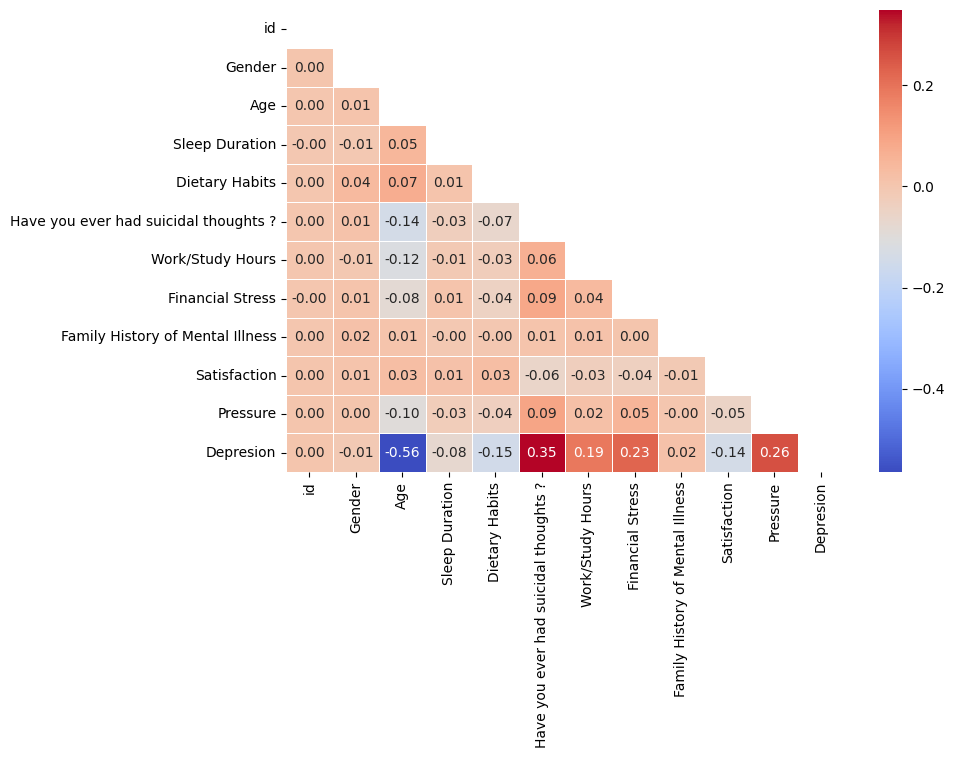

In [22]:
corr = Mental_Health.corr(numeric_only=True)
cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(Mental_Health.corr(numeric_only=True), annot=True, fmt='.2f', linewidth=0.5, cmap='coolwarm', mask=np.triu(Mental_Health.corr(numeric_only=True)))
plt.show()

In [23]:
Mental_Health['Depression'] = Mental_Health['Depresion']

In [24]:
Mental_Health = Mental_Health.drop(columns=['Depresion'],axis=1)

In [25]:
Mental_Health

,id,Gender,Age,City,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Work,Satisfaction,Pressure,Depression
0,0,1,49.0,Ludhiana,8.5,2.0,0,1.0,2.0,0,Working Professional,2.0,5.0,0
1,1,0,26.0,Varanasi,4.5,0.0,1,7.0,3.0,0,Working Professional,3.0,4.0,1
2,2,0,33.0,Visakhapatnam,5.5,2.0,1,3.0,1.0,0,Student,2.0,5.0,1
3,3,0,22.0,Mumbai,4.5,1.0,1,10.0,1.0,1,Working Professional,1.0,5.0,1
4,4,1,30.0,Kanpur,5.5,0.0,1,9.0,4.0,1,Working Professional,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,1,18.0,Ahmedabad,5.5,0.0,0,2.0,4.0,1,Working Professional,4.0,5.0,1
140696,140696,1,41.0,Hyderabad,7.5,1.0,1,6.0,5.0,1,Working Professional,4.0,5.0,0
140697,140697,1,24.0,Kolkata,8.5,1.0,0,4.0,4.0,0,Working Professional,1.0,3.0,0
140698,140698,1,49.0,Srinagar,5.5,1.0,1,10.0,1.0,0,Working Professional,2.0,5.0,0


In [26]:
Mental_Health.to_csv('Datasheet/MH.wCity.Clean.2b.csv', index=False)

Save all the clean data (train) but without separation